# Treinando dataset de Libras com WiSARD

O objetivo deste código é treinar o dataset de Libras (A linguagem brasileira de sinais) através da ferramenta de Redes neurais sem pesos conhecida como WiSARD (Wilkes, Stonham and Aleksander Recognition Device)
------


É requerida as seguintes bibliotecas Python preferencialmente no ambiente conda:
* 1 - wisardpkg
* 2 - OpenCV
* 3 - numpy
* 4 - Pandas
* 5 - skleaning
* 6 - seaborn

Esses pacotes, uma vez instalados em ambientes preconfigurados, a instalação em linha fica isenta neste notebook.

In [32]:
import cv2, os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.image as img 
import seaborn as sns
from sklearn.metrics import confusion_matrix

import wisardpkg as wp

O dataset de libras foi baixado do kaggle e encontra-se disponível neste [link](https://www.kaggle.com/datasets/williansoliveira/libras). O dataset está dividido em conjunto de imagens de treino e teste. São 21 letras do alfabeto. Para os dados de treinamento, cada caracter contém em torno de 1686 imagens do tipo PNG, totalizando 34714 entradas. No conjunto de teste cada caracter conta com uma quantidade média de 579 imagens no mesmo formato, totalizando 11548. Todas as imagens estão nas medidas de 64 X 64 pixels.

Abaixo segue alguns exemplos:

C:\Users\andre\PycharmProjects\testeWISARD\aplicado_a_libras_dataset


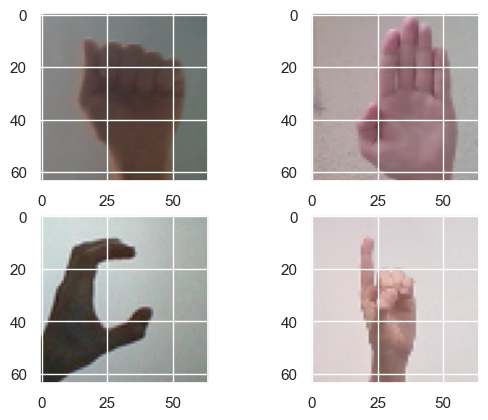

In [69]:
fig, ax = plt.subplots(2,2)
print(os.getcwd())

letras_para_imprimir = np.array(['A', 'B', 'C', 'D'])
indices = np.array([0, 0, 1, 1])
indices2 = np.array([0, 1, 0, 1])

for num, num2, letra_dir in zip(indices, indices2, letras_para_imprimir, ):     
    testImage = img.imread(os.path.join('..', 'archive', 'train', letra_dir, '1.png'))

    ax[num, num2].imshow(testImage)




Para adaptar os dados ao uso da ferramenta WiSARD, foram realizados alguns procedimentos:
* As imagens foram transformadas para o formato CSV. Para isto, um flatten foi aplicado na matriz da imagem em escala de cinza. Tudo isto usando as bibliotecas OpenCV e Numpy. O que resultou num vetor linha de comprimento igual a 4096, representando cada pixel da imagem numa escala de 0 à 255. Também o rótulo da imagem foi adicionado a primeira posição do vetor.
* Em seguida os dados foram tabulados com o auxílio do Pandas, ficando o DataFrame conforme o exemplo seguinte:

```
|label|pixel0|pixel1|pixel2| ... |pixel4093|pixel4094|pixel4095|  
| A   |  100 |  0   |  95   | ... |    84   |  2      |   220   |  
| A   |  100 |  0   |  95   | ... |    84   |  2      |   220   |  
| A   |  100 |  0   |  95   | ... |    84   |  2      |   220   |  
  .  
  .  
  .  
| Y   |  200 |  0   |  35   | ... |    184   |  222   |   220   |  
| Y   |  70  | 10   |  95   | ... |    4     |  12    |   220   |  
| Y   |  120 |  110 |  175  | ... |    14    |  2     |   220   |  
```
* 

### Dados atribuídos aos dataframes do Pandas

In [12]:

train = pd.read_csv("imagens2csv/train.csv")
test = pd.read_csv("imagens2csv/test.csv")

X_train = train.drop(labels=['label'], axis=1).astype('int').values.tolist()
y_train = train['label'].astype('str').values.tolist()

X_test = test.drop(labels=['label'], axis=1).astype('int').values.tolist()
y_test = test['label'].astype('str').values.tolist()


#### Função definida para contabilizar a acurácia dos teste no modelo

In [13]:
def accuracy(y, y_hat):
  count = 0
  for i in range(len(y)):
    if (y[i] == y_hat[i]):
      count += 1
  return count / len(y)

#### wsd configurado

In [14]:

wsd = wp.Wisard(
  3, # addressSize 5
  bleachingActivated=True,
  ignoreZero=False,
  completeAddressing=True,
  verbose=True,
  indexes=[],
  base=256,
  confidence=1,
  returnActivationDegree=False,
  returnConfidence=False,
  returnClassesDegrees=False
)

#### Treinamento

In [15]:
print("Training...")
wsd.train(X_train, y_train)

Training...


In [16]:

print("Predicting test data...")
pred = wsd.classify(X_test)
print("  - Accuracy on test data: {:.2f}%".format(accuracy(y_test, pred)*100))

Predicting test data...
  - Accuracy on test data: 89.20%


### A matriz de confusão é mostrada a seguir

<AxesSubplot: >

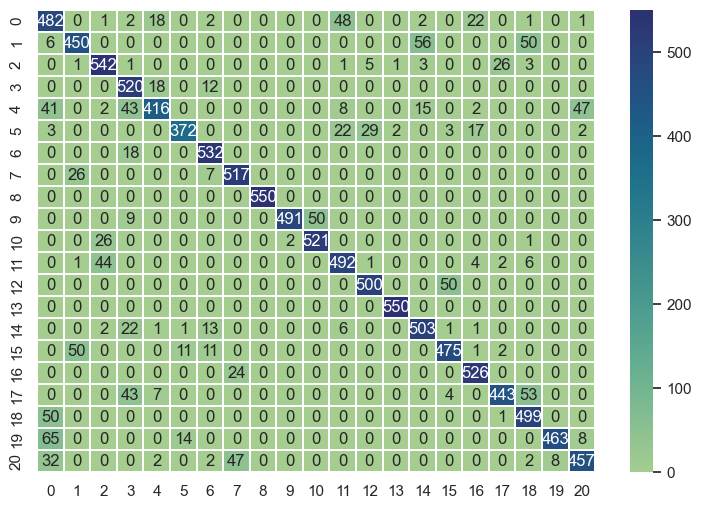

In [30]:
sns.set_theme()
cm = confusion_matrix(y_test, pred, labels=[f'{a}' for a in "ABCDEFGILMNOPQRSTUVWY"])
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, cmap="crest",annot=True, fmt="d", linewidths=.1,ax=ax)